# Linear and Logistic Regression 

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

## Question 1

Consider the following training data:

$\mathbf{x^{(1)}} =\begin{bmatrix} 1 \\ 1  \\ \end{bmatrix} $,  $\mathbf{x^{(2)}} =\begin{bmatrix} 2 \\ 1  \\ \end{bmatrix} $,   $\mathbf{x^{(3)}} =\begin{bmatrix} 1 \\ 3 \\ \end{bmatrix} $,      $\mathbf{x^{(4)}} =\begin{bmatrix} 3 \\ 3  \\ \end{bmatrix} $

$y^{(1)} = 1.4$, $y^{(2)} = 0.5$, $y^{(3)} = 2$, $y^{(4)} = 2.5$

Our goal is to fit a Linear Regression that minimizes the sum of squared errors on the training data.

❓ Find the closed form solution for a linear regression that minimizes the sum of squared errors on the training data. You need to:
 1. Define matrix $\mathbf{X}$ with shape $n \times (d+1)$, accounting for the bias parameter.
 2. Define target vector $\mathbf{y}$
 3. Use closed form solution to get optimal $\mathbf{\hat{w}}$

Useful functions: [`np.linalg.inv`](https://numpy.org/doc/stable/reference/generated/numpy.linalg.inv.html)

In [2]:
X = np.array([[1,1,1],[1,2,1],[1,1,3],[1,3,3]])
y = np.array([[1.4,0.5,2,2.5]]).T

w = np.linalg.inv(X.T @ X).dot(X.T) @ y

print(w)


[[0.275]
 [0.02 ]
 [0.645]]


❓ Predict the target value for $\mathbf{x_{query}} = [2, 3]^\top$

In [4]:
print(w.T @ np.array([1,2,3]))


[2.25]


❓ Use the provided function `plot_hyperplane_3d` to plot the training data and the predicted hyperplane. 

In [7]:
'''
Function that plots hyperplane defined by weights w, sucht that w.x = 0.
points: matrix with observations where the fisrt column is supposed to be the bias constant column
target: target vector  
'''

def plot_hyperplane_3d(w, points, target):
    x1 = np.linspace(0, 4, 10)
    x2 = np.linspace(0, 4, 10)
    a, b = np.meshgrid(x1,x2)
    N = x1.size
    X = np.array([np.ones(N**2), a.ravel(), b.ravel()]).transpose()
    o = X.dot(w)
    
    ax = plt.figure().add_subplot(projection='3d')
    ax.plot_surface(a, b, np.reshape(o,(N,N)), alpha=0.5,
                    linewidth=0, antialiased=True)
    ax.scatter(points[:,1], points[:,2], target, color='red')

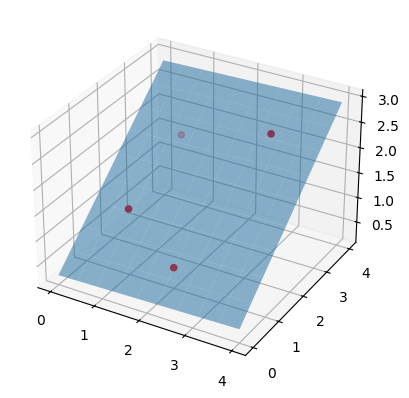

In [8]:
# Plot your solution here
plot_hyperplane_3d(w,X,y)

❓ Compute the mean squared error produced by the linear regression.

In [11]:
# your code here

print(1/np.size(y) * np.sum((y - X @ w)**2))

0.13224999999999998


## Question 2

Consider the following training data:

$\mathbf{x^{(1)}} =\begin{bmatrix} 3 \end{bmatrix} $,  $\mathbf{x^{(2)}} =\begin{bmatrix} 4 \end{bmatrix} $,   $\mathbf{x^{(3)}} =\begin{bmatrix} 6 \end{bmatrix} $,      $\mathbf{x^{(4)}} =\begin{bmatrix} 10 \end{bmatrix} $, 
 $\mathbf{x^{(5)}} =\begin{bmatrix} 12 \end{bmatrix} $

$y^{(1)} = 1.5$, $y^{(2)} = 11.3$, $y^{(3)} = 20.4$, $y^{(4)} = 35.8$, $y^{(5)} = 70.1$

❓ Define `x` and `y` arrays with your data and plot it.

*Hint:* Think about what shape your data should have. E.g.:`x.shape` should be `(5,1)`

In [432]:
# Your code here
x = np.array([[3],[4],[6],[10],[12]])
y = np.array([1.5,11.3,20.4,35.8,70.1]).reshape((5,1))

It is useful to consider non-linear regressions. In this question you will adopt **feature transformations** in order to fit non-linear regressions on the training data.

❓ Apply a logarithmic transformation $\phi(x_1) = log(x_1)$ and write down the closed form solution for this non-linear regression that minimizes the sum of squared errors on the training data. 

❓ Complete function `non_linear_regression` below:

In [435]:
'''
Inputs:
    x - vector of 1D observations, should have shape (n x 1)
    y - target vector, should have shape (n,)
    phi - function (feature transformation to apply)

Output: 
    X_phi - feature matrix of shape (n x 2) (accounting for bias)
    w - vector of weights found by the Least Squares Method
'''

def non_linear_regression(x,y,phi):
    # Apply transformation
    func = np.vectorize(phi)
    
    newX = func(x)
    
    # Construct X vector (accounting for bias)
    X_phi = np.concatenate([np.ones((x.shape[0],1)), newX], axis = 1)
    # print(x,newX, X_phi)
    
    # Find solution
    w = np.linalg.inv(X_phi.T @ X_phi) @ X_phi.T @ y


    return X_phi, w


❓ Fit a regression on the training data with transformation $\phi(x_1) = log(x_1)$.

❓ Fit a regression on the training data with transformation $\phi(x_1) = x_1^2$.

In [403]:
def phi1(x):
    return np.log(x)
def phi2(x):
    return x**2

In [448]:
# Your code here
x1,w1 = non_linear_regression(x,y,phi1) 

x2,w2 = non_linear_regression(x,y,phi2) 

print(x1,w1, x1 @ w1, y)

print(x2,w2)

[[1.         1.09861229]
 [1.         1.38629436]
 [1.         1.79175947]
 [1.         2.30258509]
 [1.         2.48490665]] [[-48.57471053]
 [ 42.14109667]] [[-2.27798387]
 [ 9.84525415]
 [26.93199846]
 [48.45875046]
 [56.1419808 ]] [[ 1.5]
 [11.3]
 [20.4]
 [35.8]
 [70.1]]
[[  1.   9.]
 [  1.  16.]
 [  1.  36.]
 [  1. 100.]
 [  1. 144.]] [[0.70593432]
 [0.44449288]]


❓ Plot both regressions along with the training points.

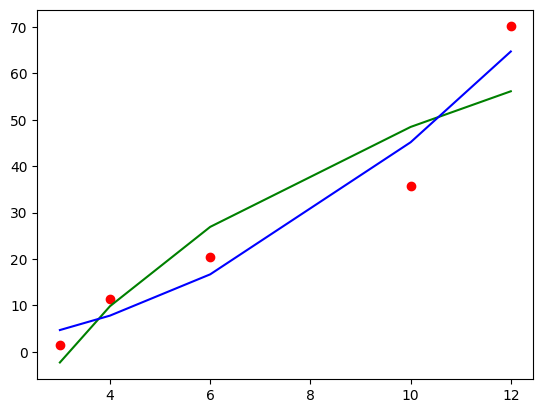

In [ ]:
# your regressions here 
plt.scatter(x,y, c = 'r')
plt.plot(x, x1 @ w1, c = 'g')
plt.plot(x, x2 @ w2, c = 'b')


plt.show()

❓ Which one is a better fit? 

In [461]:
# Your code here
def sse(y, y_pred): 
    return np.sum((y - y_pred) ** 2)


print(sse(x1 @ w1, y))
print(sse(x2 @ w2, y))

414.1267145462016
152.58056030223767


❓ **(Optional):** Generalize your function to be able to apply several feature transformations, *i.e.*, to perform regressions of type:

$$\hat{y}(x) = w_0 + w_1\phi_1(x) + ... + w_d\phi_d(x)$$

Use your function to fit a polynomial of degree 3 to the training data.

In [500]:
def multi_non_linear_regression(x,y,phi_list):
    newX = np.zeros((x.size,len(phi_list)))
    # Apply transformation

    for i,phi in enumerate(phi_list):
        func = np.vectorize(phi)
        # print(func(x), newX[:,i])
        newX[:,i] = func(x).reshape(5,)
    
    # Construct X vector (accounting for bias)
    # print(x,newX)
    X_phi = np.concatenate([np.ones((x.shape[0],1)), newX], axis = 1)
    
    # Find solution
    w = np.linalg.inv(X_phi.T @ X_phi) @ X_phi.T @ y
    
    
    return X_phi, w

In [463]:
def f1(x):
    return x

def f2(x):
    return x**2

def f3(x):
    return x**3

In [502]:
x_phi, w = multi_non_linear_regression(x,y,[f1,f2,f3])

print(x_phi, w)

print(sse(y, x_phi @ w))

[[1.000e+00 3.000e+00 9.000e+00 2.700e+01]
 [1.000e+00 4.000e+00 1.600e+01 6.400e+01]
 [1.000e+00 6.000e+00 3.600e+01 2.160e+02]
 [1.000e+00 1.000e+01 1.000e+02 1.000e+03]
 [1.000e+00 1.200e+01 1.440e+02 1.728e+03]] [[-74.10314165]
 [ 39.6269051 ]
 [ -5.67052361]
 [  0.28078541]]
0.21551753155682374


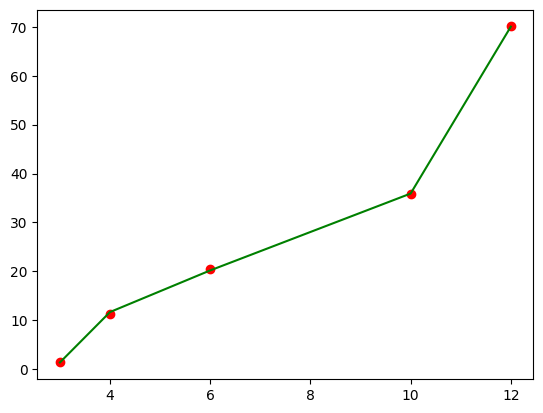

In [ ]:
plt.scatter(x,y, c = 'r')
plt.plot(x, x_phi @ w, c = 'g')

plt.show()

## Question 3

In this exercise, we will consider binary logistic regression:


$$p_{\mathbf{w}}\left(y=1 \mid \mathbf{x}\right) = \sigma(\mathbf{w} \cdot \mathbf{x}) = \frac{1}{1+\exp\left(-\mathbf{w}\cdot\mathbf{x}\right)}$$

with the following training data:


$\mathbf{x^{(1)}} =\begin{bmatrix} -1 \\ 0  \\ \end{bmatrix} $,  $\mathbf{x^{(2)}} =\begin{bmatrix} 0 \\ 0.25  \\ \end{bmatrix} $,   $\mathbf{x^{(3)}} =\begin{bmatrix} 1 \\ 1 \\ \end{bmatrix} $,      $\mathbf{x^{(4)}} =\begin{bmatrix} 1 \\ -1  \\ \end{bmatrix} $

$y^{(1)} = 0$, $y^{(2)} = 1$, $y^{(3)} = 1$, $y^{(4)} = 0$

using the cross-entropy loss function.

❓ Complete function `lr_batch_gd` that computes one epoch of batch gradient descent for the logistic regression with cross-entropy loss:

In [35]:
'''
Receives:
    inputs: observations array of shape (n x (p+1)) accounting for bias
    labels: array of target values of shape (n, )
    w: initial array of weights shape ((p+1), )
    eta: scalar for learning rate
Returns:
    w: updated weights
'''

def lr_batch_gd(inputs, labels, w, eta):
    # Compute vector of probabilities of size p+1.
    p = 1/(1 + np.exp(- inputs.dot(w)))
    # Compute gradient of loss function; vector of size p+1.
    grad = inputs.T @ (p - labels)

    w = w - eta * grad

    # Gradient descent update of w
    return w

❓ Test your function on the provided training data assuming an initialization of all zeros for the weights and a learning rate of $\eta=1$

In [36]:
x = np.array([[-1, 0],
              [0, 0.25],
              [1, 1],
              [1, -1]])

# Adding column of 1s to account for bias
inputs = np.concatenate([np.ones((x.shape[0],1)), x], axis = 1)


y = np.array([0, 1, 1, 0])

# Initialize weights and set learning rate
w = np.array([0,0,0])
eta = 1

# Test function
w = lr_batch_gd(inputs,y,w,eta)
print(w)

[0.    0.5   1.125]


Let us now use **stochastic gradient descent** where we make one weight update for each training example, i.e. in one epoch there should be $n$ weight updates.

❓ Complete function `lr_sgd` to execute one epoch of stochastic gradient descent. Test your function on the training data.

*Hint:* Python's [`zip`](https://www.geeksforgeeks.org/zip-in-python/) function is useful to iterate through several lists/arrays in parallel. 

In [90]:
'''
Receives:
    inputs: observations array of shape (n x (p+1)) accounting for bias
    labels: array of target values of shape (n, )
    w: initial array of weights shape ((p+1), )
    eta: scalar for learning rate
Returns:
    w: updated weights
'''

def lr_sgd(inputs, labels, w, eta):
    # For each training example 
    for x,y in zip(inputs, labels):
        x = np.reshape(x,(3,1))
        # Compute probability y_hat
        prob = 1/(1 + np.exp(-w.T.dot(x)))

        grad = x * (prob - y)
        
        # Compute gradient

        w = w - eta * grad
        # Update weights:
        
    return w

❓ Compute 3 epochs of SGD on your training data and use the provided `plot_separation_line` to see your end results.

In [41]:
# Plot separation line associated with model w, along with the data.
def plot_separation_line(inputs, labels, w):
    # Plot data.
    plt.plot(inputs[labels == 0, 1], inputs[labels == 0, 2], "b.")
    plt.plot(inputs[labels == 1, 1], inputs[labels == 1, 2], "r.")
    
    # Plot model separation line.
    # w0 + w1*x1 + w2*x2 = 0.
    x1 = np.array([-2, 2])
    x2 = (-w[0] - w[1]*x1) / w[2]
    plt.plot(x1, x2, 'k--')
    plt.show()

[[-0.24882603]
 [ 0.12871464]
 [ 1.15637038]]
[[-0.25431834]
 [ 0.34606094]
 [ 1.78335914]]
[[-0.22464037]
 [ 0.54365844]
 [ 2.21990668]]


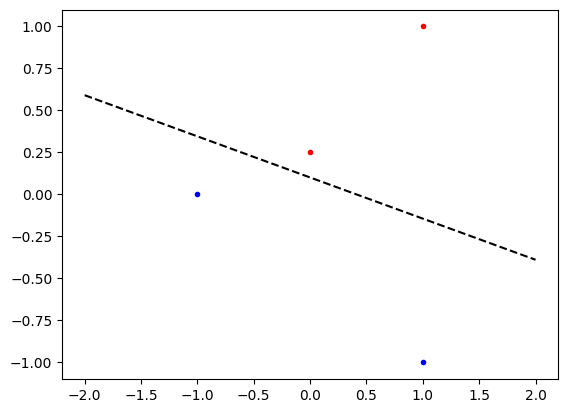

In [95]:
# Run 3 epochs
w = np.array([[0,0,0]]).T

for i in range(3):
    w = lr_sgd(inputs, y, w, 1)
    print(w)
# Plot hyperplane
plot_separation_line(inputs, y, w)


## Question 4

Logistic Regression can also be used for multi-class classification. We will use logistic regression on real data to solve the task of classifying handwritten digits.

The dataset is loaded below: 

There are 1797 observations with 64 features classified into 10 classes.


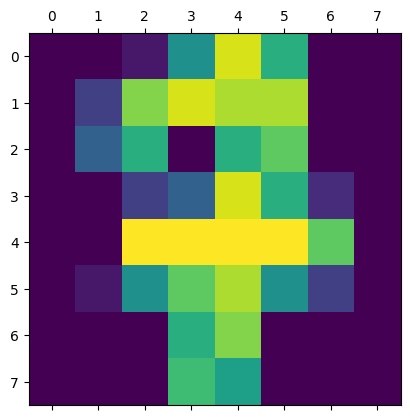

In [99]:
from sklearn.datasets import load_digits
data = load_digits()

inputs = data.data  # num_examples x num_features
labels = data.target  # num_examples x num_labels

n, p = np.shape(inputs)
n_classes = len(np.unique(labels))  # labels are 0, 1, ..., num_labels-1

print(f'There are {n} observations with {p} features classified into {n_classes} classes.')

# Augment points with a dimension for the bias.
inputs = np.concatenate([np.ones((n, 1)), inputs], axis=1)

# Observation example
plt.matshow(data.images[17])
plt.show()

❓ Complete function `multi_class_lr_epoch` to run one epoch of stochastic gradient descent for multi-class logistic regression.

*Hint:* When dealing with matrix calculus one needs to be careful with dimensions. An array with shape `(n,)` is not the same as an array with shape `(n,1)`. Function [`np.expand_dims`](https://numpy.org/doc/stable/reference/generated/numpy.expand_dims.html) is one way to reshape your arrays into the desired format.

In [367]:
def softmax(m):
    e = np.exp(m - np.max(m))
    return e / e.sum()

In [390]:
'''
Receives:
    inputs: observations array of shape (n x (p+1)) accounting for bias
    labels: array of target values of shape (n, )
    W: initial array of weights of shape (n_classes x (p+1) )
    eta: scalar for learning rate
Returns:
    w: updated weights
'''
def multi_class_lr_epoch(inputs, labels, W, eta):
    # For each observation in data
    for x,y in zip(inputs, labels):
        one_hot_y = np.zeros((n_classes,1))
        one_hot_y[y] = 1

        x = x.reshape((65,1))
        # Get probability scores according to the model (num_labels x 1).
        # One-hot encode true label (num_labels x 1).

        # Softmax function
        # This gives the label probabilities according to the model (num_labels x 1).
        h = softmax(W @ x)
        # print(h.shape)

        # SGD update. W is num_labels x num_features.
        grad = (one_hot_y - h) @ x.T

        # print(grad.shape)
        W = W + eta * grad
        # break
        
    # print(h.shape, one_hot_y.shape, x.shape)

    return W

Let's split the data into train an test sets:

In [102]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(inputs, labels, test_size=0.2, random_state=42)

❓ Run 100 epochs of your multi-class Logistic Regression algorithm on the training data, initializing weight matrix with zeros and learning rate of 0.001.

In [391]:
# Your code here
w = np.zeros((n_classes, p + 1))
for i in range(100):
    w = multi_class_lr_epoch(X_train, y_train, w, 0.001)
print(w)


[[ 2.25112039e-03  0.00000000e+00 -8.69901862e-03 -1.06024462e-03
   8.65044272e-02  6.27180993e-03 -7.07868329e-02 -1.21230690e-01
  -1.60425879e-02 -7.83080481e-05 -6.40176592e-02  1.61605814e-02
   1.50305037e-01  4.23789858e-02  6.53158868e-02 -6.99053676e-02
  -1.45174126e-02 -1.92595014e-03  1.18902003e-02  1.15158020e-01
  -1.98709097e-02 -3.15771718e-01  1.46861110e-01  3.92557723e-02
  -3.75395091e-03 -9.60265901e-04  1.32066348e-01  1.27140728e-01
  -1.19579857e-01 -4.18800650e-01  6.25454464e-02  7.80297970e-02
  -3.63244745e-05  0.00000000e+00  1.62799322e-01  8.69910880e-02
  -1.69164591e-01 -3.50235185e-01  4.02777699e-02  7.16299159e-02
   0.00000000e+00 -4.82189624e-05 -2.67231805e-02  2.54630030e-01
  -1.76530239e-01 -1.43125017e-01  7.79373969e-02  3.41403422e-02
  -9.74375376e-05 -9.51254041e-04 -1.13902953e-01  1.13097848e-01
  -7.99969074e-02  1.59914101e-01  2.75962700e-02 -3.85346169e-02
  -3.78279858e-03 -1.47513422e-06 -1.22081025e-02 -5.70214811e-02
   1.83318

❓ Complete function `multi_class_classify` to generate predicted labels for provided inputs and trained weights $W$.

In [392]:
'''
Receives:
    inputs: observations of shape (n x (p+1))
    W: weight matrix of shape (n_classes x p+1)
Outputs: 
    y_hat: array of predicted labels of shape (n,)
'''

def multi_class_classify(inputs, W):
    # Complete function
    y_hat = np.zeros((np.size(inputs, 0),1))
    # print(np.size(inputs, 0))
    for i,x in enumerate(inputs):
        x = np.reshape(x, (65, 1))
        # Get probability scores according to the model (num_labels x 1).

        h = softmax(W @ x)
        y_hat[i] = np.argmax(h)

    
    return y_hat

❓ Use your function to obtain predictions for both train and test sets and compute their accuracy scores.

In [400]:
# Your code here
pred_train = multi_class_classify(X_train, w)
correct = np.sum(np.isclose(pred_train.T, y_train))
print(f"{correct} / {pred_train.size} : accuracy = {correct / pred_train.size :.3f}%")

pred_test = multi_class_classify(X_test, w)
correct = np.sum(np.isclose(pred_test.T, y_test))
print(f"{correct} / {pred_test.size} : accuracy = {correct / pred_test.size :.3f}%")

1436 / 1437 : accuracy = 0.999%
347 / 360 : accuracy = 0.964%


We can compare our results with the ones obtained with Sklearn's implementation of Logistic Regression:

In [389]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(fit_intercept=False, penalty='l2')
clf.fit(X_train, y_train)
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))

1.0
0.9694444444444444


/home/pinho/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
